In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Salary_dataset_linear.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [29]:
df = df.drop(['Unnamed: 0'],axis='columns')

In [30]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [31]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


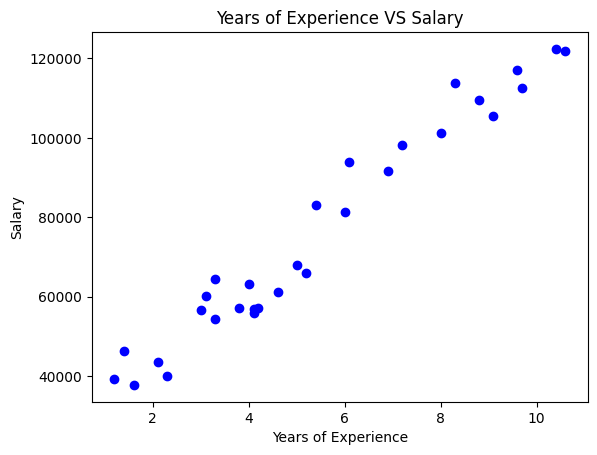

In [32]:
plt.scatter(df['YearsExperience'],df['Salary'],color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience VS Salary')
plt.show()

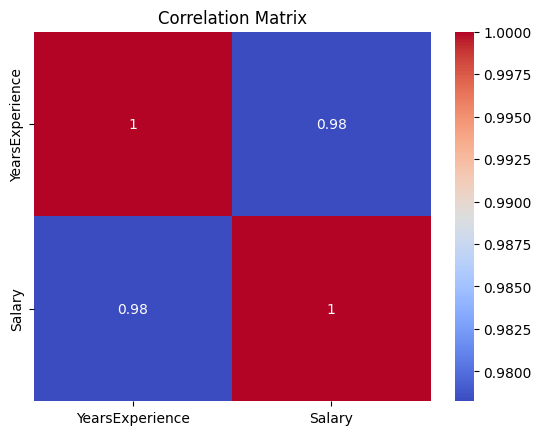

In [33]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

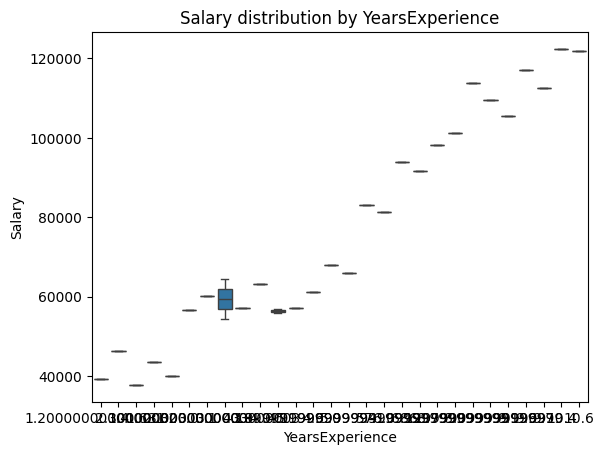

In [34]:
sns.boxplot(x='YearsExperience', y='Salary', data=df)
plt.title("Salary distribution by YearsExperience")
plt.show()

In [35]:
X = df[['YearsExperience']]
y = df['Salary']

X.describe()

,YearsExperience
count,30.000000
mean,5.413333
std,2.837888
min,1.200000
25%,3.300000
50%,4.800000
75%,7.800000
max,10.600000


In [36]:
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
modelLinear = LinearRegression()

In [40]:
modelLinear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
y_pred = modelLinear.predict(X_test)
print(modelLinear.score(X_test,y_test))
print(r2_score(y_test,y_pred))

0.9024461774180498
0.9024461774180498


In [45]:
mse = mean_squared_error(y_test, y_pred)
mse

49830096.855908334

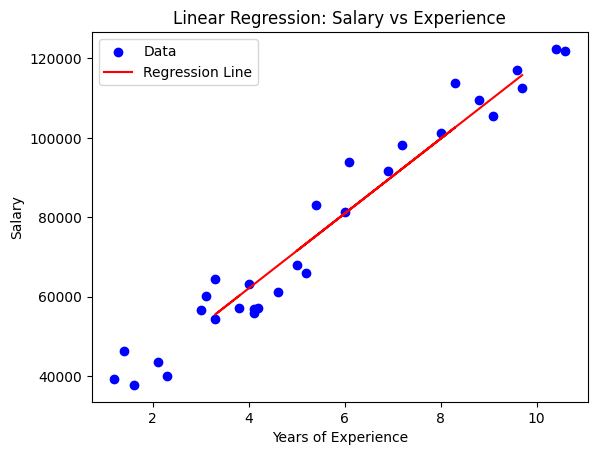

In [46]:
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.show()

In [41]:
modelCross = cross_val_predict(modelLinear,X,y,cv=8)

In [49]:
r2_scores = cross_val_score(modelLinear,X,y,cv=8,scoring='r2')
mse_scores = -cross_val_score(modelLinear,X,y,cv=8,scoring='neg_mean_squared_error')

In [51]:
r2_scores.mean()

np.float64(-0.4154412083779703)

In [52]:
mse_scores.mean()

np.float64(36426503.13076113)

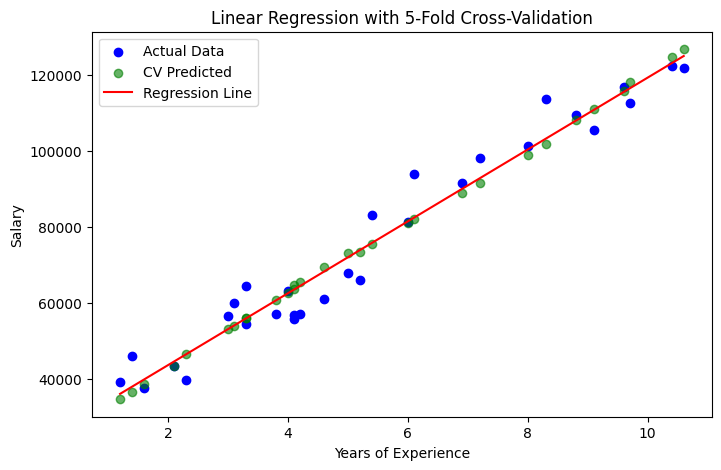

In [54]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, modelCross, color='green', alpha=0.6, label='CV Predicted')
plt.plot(X, LinearRegression().fit(X, y).predict(X), color='red', label='Regression Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression with 5-Fold Cross-Validation")
plt.legend()
plt.show()